In [190]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy.random import default_rng
rng = default_rng()
#plt.style.use(['fivethirtyeight'])

In [191]:
""" Gradient Descent for the Linear Regression with RSS """

def gradient_regression(y, X, alpha, tol):
    N = len(X[:,1]) #number of items 
    par = len(X[1,:]) #number of parameters 
    beta = np.zeros(par)
    beta.shape = (2,1)
    err = 1.0
    iteration = 1
    
    #Plotting
    x0 = X[:,1]
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x0, y, 'o')
    ax.plot(x0, beta[0]+beta[1]*x0)
    
    obj = lambda X,y: np.dot((np.dot(X,beta)-y).T,np.dot(X,beta)-y)
    while err > tol: 
        value = obj(X,y) #RSS
        gradient = 2*(np.dot((np.dot(X,beta)-y).T, X)) #gradient of RSS
        gradient.shape = (2,1)
        beta = beta - alpha/N*gradient #new values of betas
        err = abs(value - obj(X,y)) #the error from the last function evaluation to new
        iteration= iteration +1
        if iteration > 280:
            ax.plot(x0, beta[0]+beta[1]*x0)
    ax.plot(x0, beta[0]+beta[1]*x0, '--')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return beta, iteration 



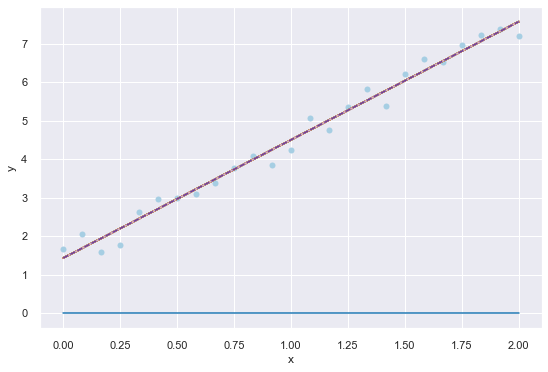

In [192]:
#Generating random data and testing 
x = np.r_[0:2:25j]
X = np.array([np.ones(25), x]).T
y = (1+3*x+rng.uniform(size = (1, len(x)))).T

alpha = 0.1 
tol = 1e-10
beta1, iterations = gradient_regression(y,X,alpha, tol)


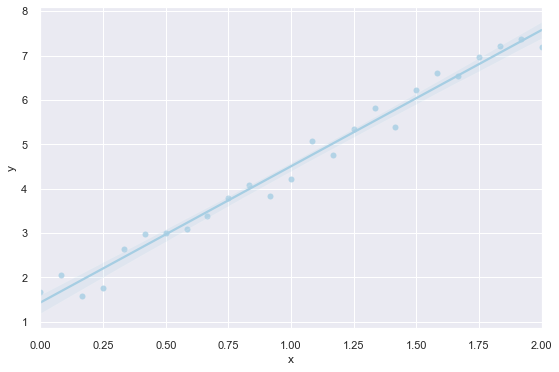

In [193]:
#Compare with the regplot from seaborn
sns.set_theme(color_codes=True, palette = 'Paired')
ax1 = sns.regplot(x=X[:,1], y=y);
ax1.set(xlabel='x', ylabel='y')
plt.show()